In [7]:
# Run this cell to load the graphics packages

using Plots; gr()
using Interact

## Adding a function parameter

In the last notebook, we saw an example of adding **parameters** to functions. These are values that control the behavior of a function. Let's look at that in some more detail.

Let's go back to our original version of the σ function:

In [11]:
σ(x) = 1 / (1 + exp(-x))

σ (generic function with 1 method)

Instead of working with a single function, we can work with a whole class (set) of functions that look similar but differ in the value of a **parameter**. Let's make a new function that uses the previous $\sigma$ function, but also has a parameter, $w$. Mathematically, we could write

$$f_w(x) = f(x; w) = \sigma(w \, x).$$

(Here, $w$ and $x$ are multiplied in the argument of $\sigma$; we could write $w \times x$ or $w * x$, or even $w \cdot x$, but usually the symbols are not written.)

Mathematically speaking, we can think of $f_w$ as a different function for each different value of the parameter $w$.

In Julia, we write this as follows:

In [12]:
f(x, w) = σ(w * x)

f (generic function with 1 method)

Note that Julia just treats parameters as additional *arguments* to the function; the function `f` has two arguments, the value of `x` and the value of `w` that we want to use.

We can now investigate the effect of $w$ interactively. To do so, we need a way of writing in Julia "the function of one variable $x$ that we obtain when we fix the value of $w$". We write this as an "anonymous function", as we saw in the notebook on functions:

    x -> f(x, w)
    
We can read this as "the function that maps $x$ to the value of $f(x, w)$, for a value of $w$ that was previously given".

Now we are ready to draw the function. For each plot, we *fix* a value of the parameter $w$ and draw the resulting function as a function of $x$. However, `Interact.jl` then allows us to modify interactively the value of $w$, and plot the new function that comes out:

In [ ]:
@manipulate for w in -2:0.01:2
    
    plot(x->f(x, w), -5, 5, ylims=(0,1), label="sigmoid")
    plot!(x->(x>0), -5,5, label="Square Wave")
end

#### Exercise 1

Try writing your own function that takes a parameter. Start by copying and executing

```julia
square(x) = x^2
```

Then use `square` to declare a new function `square_and_scale` that takes two inputs, `a` and `x` such that

$$\mathrm{square\_and\_scale}(x; a) := a \cdot x^2$$

#### Solution

You should have declared the following function:

```julia
square_and_scale(x, a) = a * x^2
```

We can write some tests as follows, using the approximate equality operator, `≈`, written as `\approx<TAB>`:

```julia
square_and_scale(1, 1) ≈ 1
square_and_scale(1, 2) ≈ 2
square_and_scale(2, 1) ≈ 4
square_and_scale(2, 2) ≈ 8
```

#### Exercise 2

Once you have declared `square_and_scale`, uncomment the code below and see how the parameter `a` scales the function `square` :

In [ ]:
# x = -10:10
# @manipulate for a in 0:0.01:10
#     plot(x, square.(x), label="x^2")
#     plot!(x, square_and_scale.(x, a), ls=:dash, label="ax^2")
# end

## Fitting a function to data

As we saw in the previous notebook, what we would like to do is use the fact that we now have a parameter in our function in order to do something useful! Namely, we want to model data with it.

So suppose that we are given a single data point $(x_0, y_0) = (2, 0.8)$. We can try to "fit" the function $f_w$ by adjusting the parameter $w$ until the function passes through the data.

**Game**: Move the slider until the graph of the function hits the data point. Which value of $w$ does that correspond to?

In [ ]:
x0, y0 = 2, 0.8

@manipulate for w in -2:0.01:2
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f")
    scatter!([x0], [y0], label="data")
end

## Quantifying how far we are from the goal: the *loss function*

We can see visually when the graph of the function passes through the data point. But the goal is to be able to automate this process so that the computer can do it unaided. 

So we will need a more precise way of deciding and quantifying (i.e. measuring with a number) *how far away we are from the goal*; here, the goal means hitting the data point with the function.

#### Exercise 3

Can you think of a way of measuring how far away our function is from the data point?

### Defining the loss function

We need to measure how far away the curve is from the data point when we choose a particular value of $w$.
One way to do this is by finding the vertical distance $d$ from the curve to the data point.

Instead of just taking the distance, it is common to take the *square* of the distance, $d^2$.

Since we are taking the vertical distance, we need the distance at the given value of $x_0$ where the data point lies. For a given value of the parameter $w$, the height of the point on the curve with that value of $x_0$ is $f(x_0, w)$.

So we take
$$d := y_0 - f(x_0, w)$$

and
$$d^2 = [y_0 - f(x_0, w)]^2.$$

This is our measure of distance. It will change when $w$ changes -- in other words, it is itself a *function of $w$*; we will denote this function by $L(w)$, and call it the **loss function**:

$$L(w) := [y_0 - f(x_0, w)]^2.$$

So the goal is to find the value $w^*$ of $w$ where the loss function is *least*; in other words, we need to *minimize* the loss function!

(Another name for a loss function is a *cost function*.)

#### Exercise 4

(a) Define the loss function `L(w)` in Julia.

(b) Draw the data point and the function `x -> f(x, w)`. Also draw a vertical line from the data point to the function `x -> f(x, w)`.

(c) Make the plot interactive.

(d) Add as the plot title the value of the loss function for the current value of $w$.

(e) Use the slider to find the value $w^*$ of $w$ for which the loss function reaches its minimum value. What is $w^*$? What is the value of the loss function there, $L(w^*)$?

#### Solution

(a) We have data

In [13]:
x0, y0 = 2, 0.8

(2, 0.8)

We define the loss function as follows:

In [14]:
L(w) = (y0 - f(x0, w))^2

L (generic function with 1 method)

(b-d): The visualization can be written as follows

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

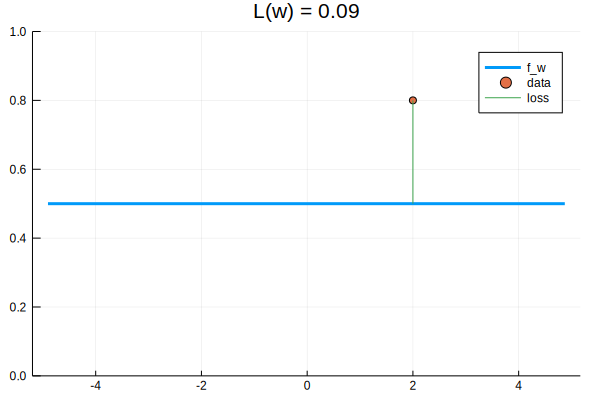

In [15]:
@manipulate for w in -2:0.01:2
    
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f_w", lw=3)  # function

    scatter!([x0], [y0], label="data")
    plot!([x0, x0], [y0, f(x0, w)], label="loss")  # vertical line

    title!("L(w) = $(round(L(w), 5))")

end

## What does the loss function look like?

The loss function $L(w)$ tells us how far away the function $f_w$ is from the data when the parameter value is $w$, represented visually as the vertical line in the previous plot. When the data are fixed, this is a function only of the parameter $w$. What does this function look like as a function of $w$? Let's draw it!

#### Exercise 5

Draw the function $L(w)$ as a function of $w$.

#### Solution

In [ ]:
plot(L, -3, 3, xlabel="w", ylabel="L(w)", ylims=(0, 0.7), label="L")

### Features of the loss function

This graph quantifies how far we are from the data point for a given value of $w$.
What features can we see from the graph?

Firstly, we see that $L(w)$ is always bigger than $0$, for any value of $w$. This is because we want $L$ to be some kind of measure of *distance*, and distances cannot be negative. 

Secondly, we see that there is a special value $w^*$ of $w$ where the function $L$ reaches its minimum value. In this particular case, it actually reaches all the way down to $0$!
This means that the original function $f$ (the one we manipulated above) passes exactly through the data point $(x_0, y_0)$.

#### Exercise 6

Draw a zoomed-in version of the graph to find the place $w^*$ where the function hits $0$ more precisely.

### A different way of defining the loss function

**Why did we use such a complicated function $L$ with those squares inside?** We could instead just have used the absolute distance, instead of the distance squared, using the *absolute value* function, written mathematically as $| \cdot |$, and in Julia as `abs`.

#### Exercise 7

Define a new loss function, `L_abs`, using the absolute value, and see what it looks like.

#### Solution

In [ ]:
L_abs(w) = abs(y0 - f(x0, w))

plot(L_abs, -3, 3, xlabel="w", ylabel="L_abs(w)", ylims=(0, 0.7), label="L_abs")

Now we see why it was previously generally preferred to use squares: using the absolute value gives a cost function that is *not smooth*. This makes it difficult to use methods from calculus to find the minimum. Nonetheless, using non-smooth functions is very common in machine learning nowadays.